from importlib import reload
from PIL import Image## **07MIAR - Redes Neuronales y Deep Learning: Artículo Científico**

**Estudiante:**  
Homero Javier Velasteguí Izurieta

---

### Introducción

En este proyecto se analiza una arquitectura de *Deep Learning* aplicada a tareas de clasificación y segmentación visual, con énfasis en la inspección estructural y funcional de un modelo previamente entrenado. Como base teórica se toma el artículo **Road Extraction by Deep Residual U-Net** (Zhang, Liu y Wang, 2017), en el cual se propone una variante de la arquitectura U-Net que incorpora conexiones residuales para mejorar el desempeño en tareas de segmentación semántica sobre imágenes. La versión pre print del artículo se encuentra en el siguiente  [enlace](https://arxiv.org/pdf/1711.10684)

En el desarrollo práctico del trabajo se emplea una implementación pública similar al modelo descrito en el artículo, la cual permite examinar la estructura interna de la red y el comportamiento de sus tensores de entrada y de algunos de sus componentes más relevantes durante la inferencia. A partir de esta implementación se presentan y justifican las salidas solicitadas en la consigna, combinando análisis teórico y evidencia empírica obtenida directamente del modelo. El modelo analizado corresponde a `EE8204-ResUNet`desarrollado por Edwin P Alegre, el código fuente se encuentra en el siguiente [repositorio](https://github.com/edwinpalegre/EE8204-ResUNet) Para el presente trabajo, dado que se trabajó con la versión 12 de Python, fué necesario convertir el modelo .hdf5 a .keras, para esto se utilizaron los scripts de la carpeta módulos.

El código y recursos complementarios de este proyecto están alojados en el siguiente repositorio de [https://github.com/fresvel/07MIAR_ARTICULO](Github)

### Importación de librerías necesarias

In [39]:
from importlib import reload
from PIL import Image

import modulos.model_latex as  model_latex_module
reload(model_latex_module)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from modulos.model_latex import ModelSummaryToLatex



### **1.- Model summary, con las capas y número de hyperparámetros.**

In [40]:
unet_model = tf.keras.models.load_model("assets/best_model.keras")
unet_model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_1             │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Rescaling)  │ (None, 224, 224,  │          0 │ input_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │      1,792 │ lambda[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 224, 224,  │        256 │ lambda[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ add[0][0]         │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │     73,856 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 112, 112,  │      8,320 │ add[0][0]         │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 112, 112,  │    147,584 │ activation_2[0][

 Total params: 8,233,025 (31.41 MB)

 Trainable params: 8,223,809 (31.37 MB)

 Non-trainable params: 9,216 (36.00 KB)

La salida del método `unet_model.summary()` proporciona una vista detallada de la arquitectura de la red utilizada, mostrando de forma explícita cada una de las capas que componen el modelo, sus dimensiones de salida, el número de parámetros asociados y las dependencias entre capas. El modelo analizado corresponde a una implementación pre-entrenada de una **Deep Residual U-Net**, diseñada para tareas de segmentación semántica a nivel de píxel.

A partir del análisis de la salida, se identifica que el modelo implementa una arquitectura tipo **U-Net con bloques residuales**, orientada a segmentación semántica a nivel de píxel. Esta clasificación se fundamenta en dos evidencias estructurales observables en el resumen del modelo:

1. **Estructura encoder–decoder con conexiones entre escalas equivalentes**

En el `summary` se observa una reducción progresiva de la resolución espacial de los tensores de activación, seguida por una recuperación simétrica en etapas posteriores. Por ejemplo, aparecen tensores intermedios con formas:

- (224, 224, 64)  
- (112, 112, 128)  
- (56, 56, 256)  
- (28, 28, 512)

Posteriormente, estas resoluciones vuelven a incrementarse mediante capas `UpSampling2D`, recuperando las dimensiones:

- (56, 56, ·)  
- (112, 112, ·)  
- (224, 224, ·)

Además, en las etapas de subida se identifican capas `Concatenate` que reciben como entrada dos tensores con la **misma resolución espacial**, uno proveniente de la ruta de decodificación y otro generado previamente en la ruta de codificación. Esta correspondencia explícita de tamaños en las capas `Concatenate` es característica de arquitecturas tipo U-Net, donde se reutilizan características del encoder para preservar información espacial fina.

2. **Presencia de bloques residuales**

En múltiples secciones del `summary` aparecen capas del tipo `Add`, las cuales combinan dos tensores con idéntica forma. Al inspeccionar las capas inmediatamente anteriores a estas operaciones, se observa que uno de los tensores corresponde a la salida de una secuencia convolucional (`Conv2D` seguida de `BatchNormalization` y activación), mientras que el otro tensor proviene de una conexión directa desde una capa anterior del mismo bloque.

Este patrón observable en el resumen se ajusta al esquema de aprendizaje residual, que puede representarse de forma simplificada como:

#### **Estructura global del modelo**

La arquitectura recibe como entrada imágenes RGB de tamaño fijo **(224, 224, 3)**, que son previamente normalizadas mediante una capa de *rescaling*. A partir de este punto, la red se divide en tres grandes etapas: codificación, cuello de botella y decodificación, culminando en una capa de salida para segmentación binaria.

Durante todo el modelo se observa el uso sistemático de capas `Conv2D`, `BatchNormalization` y funciones de activación no lineales, organizadas en bloques residuales conectados mediante capas `Add`.

1. **Ruta de codificación (encoder)**

La fase de codificación está compuesta por varios bloques convolucionales residuales que reducen progresivamente la resolución espacial de la imagen, al mismo tiempo que incrementan la dimensionalidad del espacio de características. En el resumen del modelo se aprecia claramente esta progresión:

- Resolución espacial:  
  224×224 → 112×112 → 56×56 → 28×28
- Profundidad de canales:  
  64 → 128 → 256 → 512

Cada bloque incluye conexiones residuales (`Add`), que suman la entrada del bloque con su salida transformada, favoreciendo la estabilidad del entrenamiento y mitigando problemas de degradación en redes profundas.

2. **Cuello de botella (bottleneck)**

En la zona más profunda del modelo, correspondiente a la menor resolución espacial, se concentran las capas con mayor número de parámetros. En este nivel se extraen representaciones altamente abstractas de la escena, capturando información semántica global relevante para la identificación de carreteras. Esta etapa actúa como nexo entre el proceso de compresión del encoder y la posterior reconstrucción del decoder.

3. **Ruta de decodificación (decoder)**

La fase de decodificación invierte progresivamente el proceso de submuestreo mediante capas `UpSampling2D`, recuperando la resolución espacial original de la imagen. En cada nivel, las características generadas se combinan con las correspondientes salidas del encoder mediante capas `Concatenate`, lo que permite reincorporar información espacial fina perdida durante la codificación.

A medida que aumenta la resolución, el número de filtros disminuye, manteniendo un equilibrio entre detalle espacial y complejidad computacional. Este mecanismo resulta especialmente relevante para preservar estructuras delgadas y continuas, como las carreteras.

4. **Capa de salida y parámetros**

El modelo finaliza con una capa `Conv2D` de tamaño de kernel 1×1 y un único canal de salida, produciendo un tensor de forma **(224, 224, 1)**. La activación sigmoide transforma esta salida en un mapa de probabilidades, donde cada valor indica la probabilidad de que el píxel correspondiente pertenezca a la clase “carretera”.

El número total de parámetros del modelo es del orden de **8.2 millones**, concentrándose mayoritariamente en las capas convolucionales profundas del encoder y del decoder, lo cual es coherente con la complejidad de la tarea de segmentación semántica a alta resolución.


### **2. Tensor de entrada: forma y distribución de valores (ejemplo con imagen)**

Para responder a este punto se utiliza una imagen RGB concreta (redimensionada a 224×224) y se construye explícitamente el tensor de entrada con la forma esperada por `unet_model`. Posteriormente se reporta su forma, tipo de dato y la distribución de intensidades por canal.


#### Forma del tensor de entrada

El modelo espera como entrada un tensor de cuatro dimensiones con formato **NHWC**, cuya forma es:

\[
(1, 224, 224, 3)
\]

donde:
- **1** corresponde al tamaño del lote (*batch size*),
- **224 × 224** representan la resolución espacial de la imagen,
- **3** corresponde a los canales de color RGB.

Esta forma es consistente con la capa de entrada observada en `unet_model.summary()` y permite que el modelo procese imágenes a color a resolución fija, produciendo posteriormente una predicción por píxel.

**Construcción del tensor de entrada.**  
La entrada del modelo corresponde a un lote (*batch*) de tamaño 1, con forma **(1, 224, 224, 3)** (formato NHWC). En el código se genera primero el tensor “crudo” en `uint8` (0–255). Dado que el modelo incorpora una etapa inicial de reescalado/normalización, también se calcula la versión “normalizada” en `float32` (0–1), que representa el rango efectivo con el que operan las primeras convoluciones.


Entrada (uint8, 0–255): shape=(1, 224, 224, 3), dtype=uint8
  min=0.0000, max=251.0000, mean=88.3888, std=49.8795
  canal R: min=0.0000, max=248.0000, mean=88.3615, std=49.4753
  canal G: min=0.0000, max=248.0000, mean=91.1246, std=48.8627
  canal B: min=0.0000, max=251.0000, mean=85.6802, std=51.1243
Entrada (float32, 0–1): shape=(1, 224, 224, 3), dtype=float32
  min=0.0000, max=0.9843, mean=0.3466, std=0.1956
  canal R: min=0.0000, max=0.9725, mean=0.3465, std=0.1940
  canal G: min=0.0000, max=0.9725, mean=0.3574, std=0.1916
  canal B: min=0.0000, max=0.9843, mean=0.3360, std=0.2005


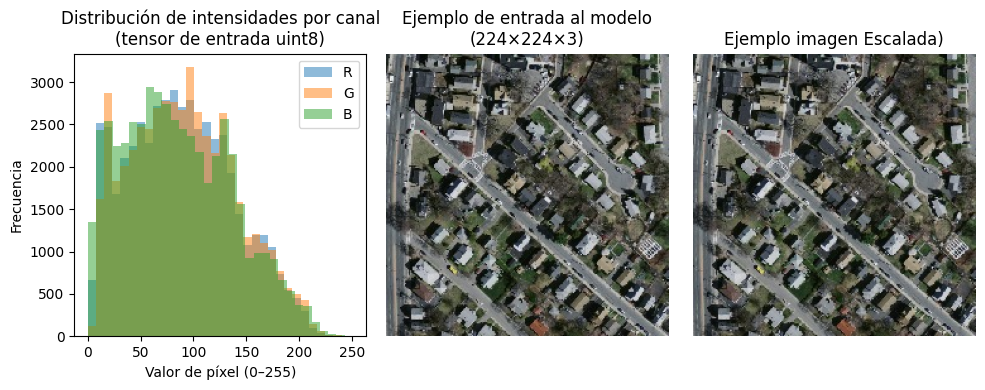

In [73]:
# 1) Cargar y preparar imagen
img = Image.open("assets/image.jpeg").convert("RGB").resize((224, 224))
x_uint8 = np.array(img, dtype=np.uint8)                 # (224,224,3), 0..255
entrada_uint8 = x_uint8[None, ...]                      # (1,224,224,3)

# 2) Versión normalizada (útil para describir el rango efectivo)
entrada_float = entrada_uint8.astype(np.float32) / 255.0  # (1,224,224,3), 0..1

# 3) Reporte de forma y estadísticas (cruda y normalizada)
def stats(x, name):
    x0 = x[0]  # quitamos batch para análisis
    print(f"{name}: shape={x.shape}, dtype={x.dtype}")
    print(f"  min={x0.min():.4f}, max={x0.max():.4f}, mean={x0.mean():.4f}, std={x0.std():.4f}")
    for c, ch in enumerate(["R","G","B"]):
        xc = x0[..., c]
        print(f"  canal {ch}: min={xc.min():.4f}, max={xc.max():.4f}, mean={xc.mean():.4f}, std={xc.std():.4f}")

stats(entrada_uint8, "Entrada (uint8, 0–255)")
stats(entrada_float, "Entrada (float32, 0–1)")

# 4) Histogramas por canal (distribución)
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# 4) Histogramas por canal (distribución)
for i, ch in enumerate(["R", "G", "B"]):
    ax[0].hist(
        entrada_uint8[0, ..., i].ravel(),
        bins=32,
        alpha=0.5,
        label=ch
    )

ax[0].set_title("Distribución de intensidades por canal\n(tensor de entrada uint8)")
ax[0].set_xlabel("Valor de píxel (0–255)")
ax[0].set_ylabel("Frecuencia")
ax[0].legend()

# 5) Visualización de la imagen de entrada
ax[1].imshow(entrada_uint8[0])
ax[1].set_title("Ejemplo de entrada al modelo\n(224×224×3)")
ax[1].axis("off")


# 5) Visualización de la imagen escalada
ax[2].imshow(entrada_float[0])
ax[2].set_title("Ejemplo imagen Escalada)")
ax[2].axis("off")

plt.tight_layout()
plt.show()



#### Distribución de valores (tensor crudo)

Inicialmente, el tensor de entrada se construye en formato `uint8`, con valores enteros en el rango **[0, 255]**, que representan intensidades de píxel estándar. Para la imagen utilizada se obtienen los siguientes estadísticos globales:

- Valor mínimo: 0  
- Valor máximo: 251  
- Media global: ≈ 88.39  
- Desviación estándar: ≈ 49.88  

El análisis por canal muestra distribuciones similares en los canales R, G y B, con medias cercanas y desviaciones estándar comparables, lo que indica que la imagen no presenta un sesgo cromático extremo hacia un color específico.

El histograma de intensidades por canal evidencia una mayor concentración de valores en rangos bajos e intermedios, lo cual es coherente con una escena urbana aérea donde predominan superficies como asfalto, techos y vegetación, más que regiones altamente saturadas o brillantes.

#### Distribución tras normalización

Dado que el modelo incorpora una etapa inicial de reescalado, también se analiza el tensor de entrada tras una normalización lineal a `float32` en el rango **[0, 1]**, que representa el dominio efectivo de operación de las primeras capas convolucionales.

En este caso se observa:

- Valor máximo ≈ 0.98  
- Media global ≈ 0.35  
- Desviación estándar ≈ 0.20  

Estas magnitudes confirman que la normalización preserva la estructura relativa de intensidades de la imagen, pero adapta la escala de los datos a un rango numéricamente más estable para el entrenamiento y la inferencia en redes neuronales profundas.

#### Interpretación

La forma del tensor garantiza que el modelo procese la imagen como una entidad completa dentro de un lote unitario, mientras que la distribución de valores refleja una entrada visual realista y adecuadamente normalizada. Esta combinación asegura que las convoluciones iniciales puedan extraer patrones locales relevantes (bordes, texturas y contrastes) sin introducir saturaciones numéricas, lo cual es fundamental para el correcto funcionamiento del encoder del modelo.


### **3. Componente elegido: salida (logits/probabilidades) y activaciones intermedias del encoder**

Dado que `unet_model` corresponde a una arquitectura convolucional tipo U-Net, no incorpora mecanismos explícitos de *positional encoding* ni capas de *mask attention*. Por este motivo, el análisis se centra en dos elementos directamente observables en el modelo:

1. la salida final del modelo, que proporciona un mapa de probabilidades por píxel, y  
2. una activación intermedia del encoder, como evidencia del tipo de patrones espaciales que el modelo aprende internamente.

#### **(A) Salida del modelo (mapa de probabilidades)**

La salida de `unet_model` es un tensor de forma (224, 224, 1) con valores en el intervalo [0,1], obtenido tras una activación sigmoide en la última capa. Cada valor representa la probabilidad estimada de que el píxel pertenezca a la clase objetivo (carretera).


min=0.0000, max=0.9998, mean=0.1547, std=0.3223


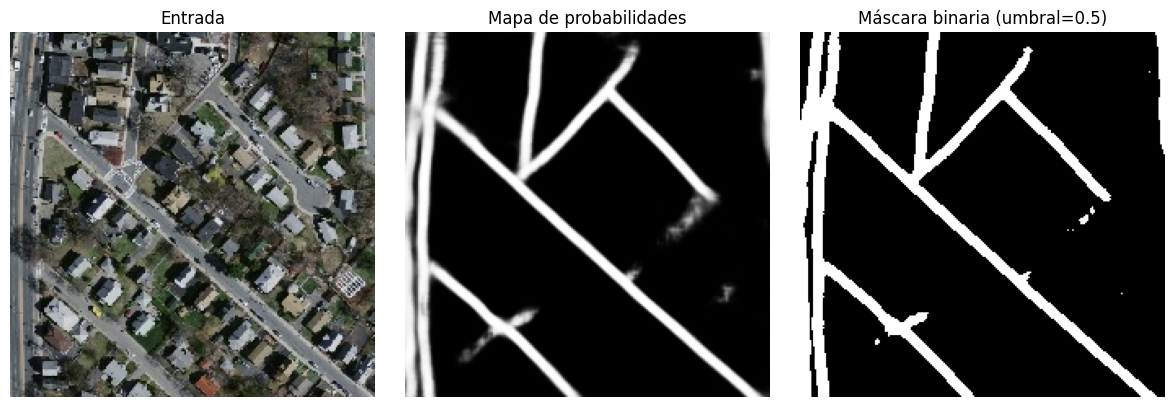

In [62]:
# Predicción final
prob = unet_model.predict(entrada_uint8, verbose=0)   # (1,224,224,1)
prob2d = prob[0, ..., 0]

print(f"min={prob2d.min():.4f}, max={prob2d.max():.4f}, "
      f"mean={prob2d.mean():.4f}, std={prob2d.std():.4f}")

# Máscara binaria
thr = 0.5
mask = (prob2d >= thr).astype(np.uint8)

# Visualización
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(entrada_uint8[0].astype(np.uint8))
ax[0].set_title("Entrada")
ax[0].axis("off")

ax[1].imshow(prob2d, cmap="gray", vmin=0, vmax=1)
ax[1].set_title("Mapa de probabilidades")
ax[1].axis("off")

ax[2].imshow(mask, cmap="gray")
ax[2].set_title("Máscara binaria (umbral=0.5)")
ax[2].axis("off")

plt.tight_layout()
plt.show()


Para el ejemplo analizado se obtuvieron los siguientes estadísticos globales:
- mínimo ≈ 0.00
- máximo ≈ 1.00
- media ≈ 0.15

Esto indica que el modelo asigna probabilidades altas únicamente a regiones específicas de la imagen.


#### **(B) Activaciones intermedias del encoder (capa `add_3`)**

Para analizar qué patrones espaciales y contextuales aprende el encoder, se seleccionó la capa `add_3`, cuya salida presenta forma (28, 28, 512). Esta capa se encuentra en una etapa profunda del encoder, próxima al cuello de botella de la arquitectura, donde las representaciones tienden a ser menos locales y más semánticas.


In [78]:
def summarize_layer(layer_name):
    m = tf.keras.Model(unet_model.input, unet_model.get_layer(layer_name).output)
    f = m.predict(entrada_uint8, verbose=0)[0]  # (h,w,c)
    # canal con mayor variación (más informativo)
    stds = f.reshape(-1, f.shape[-1]).std(axis=0)
    ch = int(np.argmax(stds))
    fmap = f[..., ch]
    print(layer_name, "shape", f.shape, "global std", f.std(), "top-channel", ch, "top-channel std", stds[ch])
    return fmap, ch, f.shape

for ln in ["add_2", "add_3"]:
    summarize_layer(ln)

add_2 shape (56, 56, 256) global std 7.1620493 top-channel 173 top-channel std 8.671954
add_3 shape (28, 28, 512) global std 7.3033323 top-channel 352 top-channel std 10.248139


Como criterio cuantitativo, se analizó la desviación estándar de las activaciones por canal. En esta capa se obtuvo una desviación estándar global de aproximadamente 7.3, con canales individuales alcanzando valores superiores a 10, lo que evidencia una variabilidad significativa entre filtros y justifica su uso como representación informativa.

Al reescalar estos mapas de activación y superponerlos sobre la imagen de entrada, se observa que las zonas con mayor activación se alinean con estructuras lineales y continuas, coherentes con el patrón esperado de las carreteras.

Estas visualizaciones corresponden a mapas de activación internos del modelo y no deben interpretarse como mecanismos explícitos de atención.



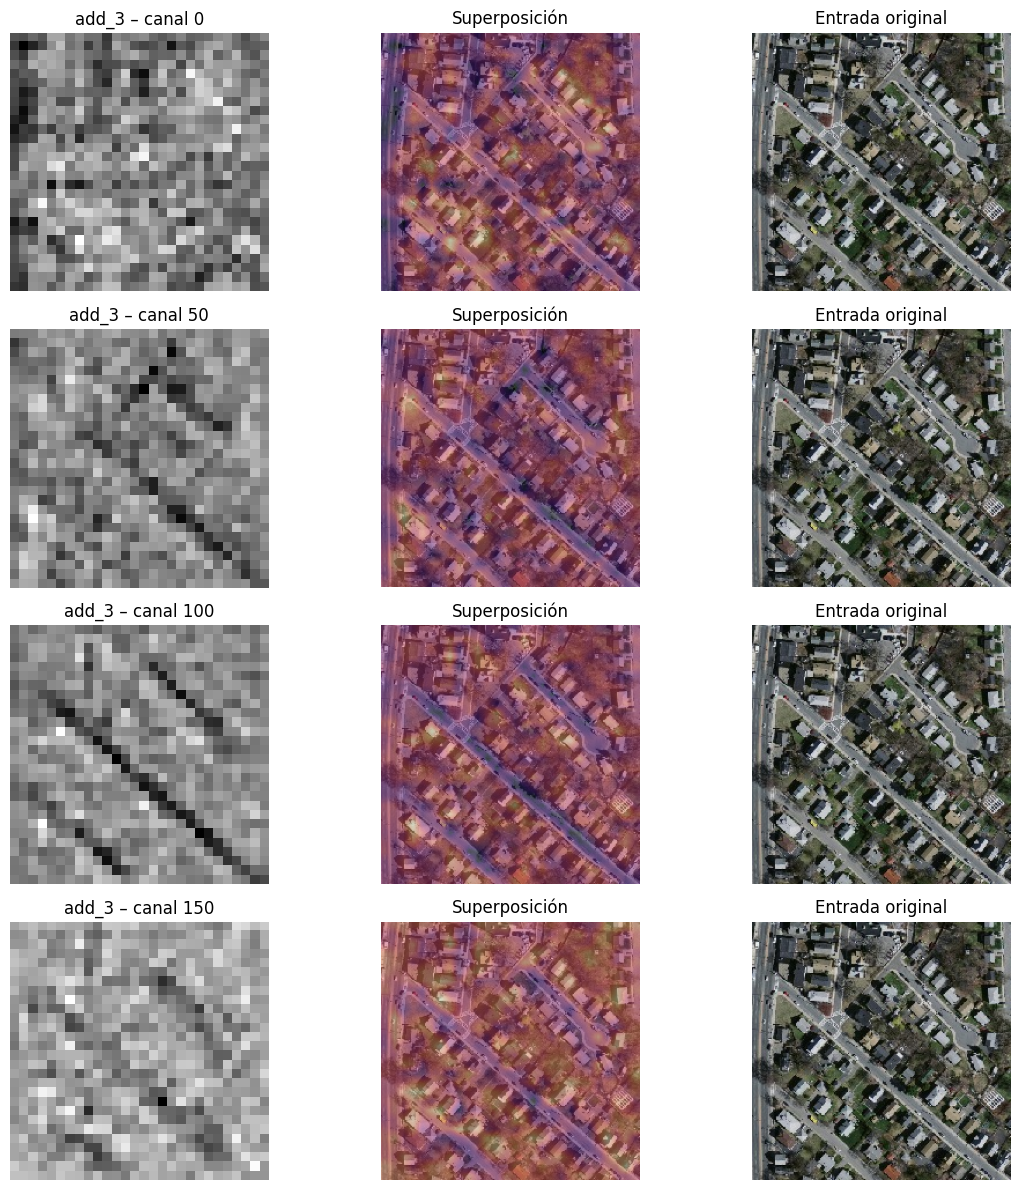

In [70]:
# Modelo para extraer activaciones del encoder
layer_name = "add_3"
feat_model = tf.keras.Model(
    inputs=unet_model.input,
    outputs=unet_model.get_layer(layer_name).output
)

features = feat_model.predict(entrada_uint8, verbose=0)  

# Canales representativos
channels = [0, 50, 100, 150]
fig, axs = plt.subplots(len(channels), 3, figsize=(12, 3*len(channels)))

for i, ch in enumerate(channels):
    fmap = features[0, ..., ch]
    up = tf.image.resize(fmap[..., None], (224, 224)).numpy().squeeze()

    axs[i, 0].imshow(fmap, cmap="gray")
    axs[i, 0].set_title(f"{layer_name} – canal {ch}")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(entrada_uint8[0])
    axs[i, 1].imshow(up, cmap="magma", alpha=0.45)
    axs[i, 1].set_title("Superposición")
    axs[i, 1].axis("off")

    axs[i, 2].imshow(entrada_uint8[0])
    axs[i, 2].set_title("Entrada original")
    axs[i, 2].axis("off")

plt.tight_layout()
plt.show()


add_2 shape (56, 56, 256) global std 7.1620493 top-channel 173 top-channel std 8.671954
add_3 shape (28, 28, 512) global std 7.3033323 top-channel 352 top-channel std 10.248139
